In [19]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from tensorflow.keras import models, layers

In [20]:
path=r"train.csv"
df=pd.read_csv(path)
if 'UID' in df.columns:
    df = df.set_index('UID')
df=df.drop(columns=['ph_no','credit_card_number','email','name','url','cvv','country','job','emoji'])#does not affect the output


In [21]:
Y=df['state']
df=df.drop(columns=['state'])

In [22]:

# Define a regular expression pattern to extract floating-point numbers
pattern = r'(-?\d+\.\d+)'

# Use str.extract to apply the pattern column-wise
df = df.apply(lambda x: x.str.extract(pattern, expand=False))

# Convert the extracted values to numeric
df = df.apply(pd.to_numeric, errors='coerce')


In [23]:
df.describe()

,K3Ll9,19rjS,yeIIP,Bw1V5,5k16L,e2l5S,cg31y,8SVMv,Xsi3p,l8Y6n,...,OaMqz,qhUzJ,FpCOT,zEnW3,ASDn5,vF2is,pZijn,WUc3c,sCIyG,qaERi
count,138761.000000,138777.000000,138736.000000,138728.000000,138713.000000,138709.000000,138654.000000,138773.000000,138761.000000,138644.000000,...,138703.000000,138683.000000,138696.000000,138748.000000,138676.000000,138746.000000,138689.000000,138688.000000,138740.000000,138685.000000
mean,0.405623,0.700885,-0.228169,0.038084,0.080741,1.088124,-0.099424,-0.508855,-0.086820,-0.461384,...,1.749606,-0.352595,-0.097552,-0.872785,-0.190779,-0.202942,0.304085,0.021870,0.982778,-0.006658
std,4.207810,17.316074,18.558254,16.804733,4.198671,19.251276,4.144329,17.998698,4.255966,17.002255,...,19.961617,19.173462,4.214975,14.922001,4.232022,4.153763,4.121639,4.232307,19.696209,4.146676
min,-17.378663,-77.636372,-88.816744,-84.533117,-20.864162,-88.800077,-20.083547,-88.428950,-18.442479,-79.156959,...,-86.398081,-88.274028,-20.444630,-70.024310,-18.823306,-18.528236,-18.311135,-19.833364,-97.657266,-18.691201
25%,-2.421919,-10.766546,-12.556615,-11.265699,-2.735720,-11.844879,-2.862022,-12.588352,-2.950469,-11.767128,...,-11.667677,-13.188030,-2.926210,-10.804452,-3.040233,-3.016949,-2.471048,-2.826263,-12.231083,-2.800190
50%,0.411023,0.829260,-0.215681,-0.115716,0.073549,1.085606,-0.080195,-0.624914,-0.081912,-0.244787,...,1.730703,-0.298878,-0.077281,-0.820220,-0.183061,-0.209118,0.312054,0.007508,0.774899,-0.020755
75%,3.224626,12.346383,12.176671,11.143424,2.907034,14.017467,2.689317,11.355298,2.789168,10.971212,...,15.137703,12.558143,2.746927,9.170924,2.670074,2.589425,3.092985,2.865800,14.006714,2.767928
max,19.441730,81.743863,77.957198,76.521389,18.870930,86.574856,19.113702,85.249397,18.095460,80.198581,...,90.727512,90.114963,18.997582,64.256785,19.636270,18.474009,19.516091,18.421846,102.783205,18.189089


In [24]:
df_imputed = df.fillna(df.median())


<Axes: ylabel='UID'>

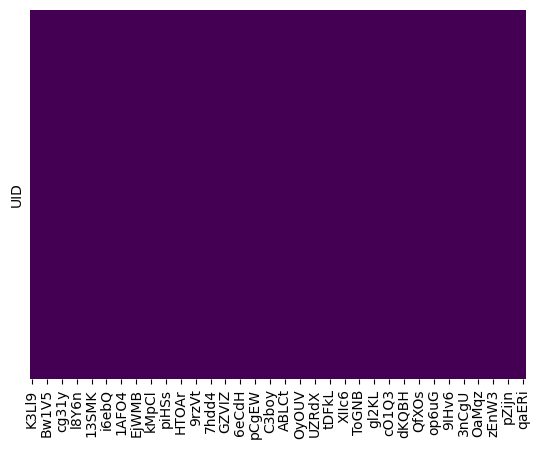

In [25]:
# sns.heatmap(df_imputed.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [26]:
def outliers_to_median(df):
    for col in df.columns:
        median = df[col].median()
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        df[col] = df[col].apply(lambda x: median if x < (q1 - 1.5 * iqr) or x > (q3 + 1.5 * iqr) else x)
    return df

# Apply outlier handling to the entire DataFrame
df = outliers_to_median(df_imputed)

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaled_data=scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

In [28]:
scaled_df.describe()

,K3Ll9,19rjS,yeIIP,Bw1V5,5k16L,e2l5S,cg31y,8SVMv,Xsi3p,l8Y6n,...,OaMqz,qhUzJ,FpCOT,zEnW3,ASDn5,vF2is,pZijn,WUc3c,sCIyG,qaERi
count,140000.000000,140000.000000,140000.000000,140000.000000,140000.000000,140000.000000,140000.000000,140000.000000,140000.000000,140000.000000,...,140000.000000,140000.000000,140000.000000,140000.000000,140000.000000,140000.000000,140000.000000,140000.000000,140000.000000,140000.000000
mean,0.500019,0.499799,0.499940,0.500592,0.500345,0.499806,0.500028,0.500435,0.500033,0.500365,...,0.499754,0.500180,0.499916,0.500226,0.500031,0.500190,0.500025,0.500236,0.500101,0.500064
std,0.180565,0.180600,0.180634,0.180736,0.180110,0.180621,0.180577,0.180651,0.180050,0.180290,...,0.179692,0.180105,0.179981,0.180346,0.179792,0.179853,0.179752,0.180319,0.180447,0.180064
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.377110,0.378004,0.378026,0.377428,0.377636,0.377117,0.377794,0.377570,0.377452,0.378130,...,0.377428,0.377748,0.377528,0.377996,0.377422,0.377062,0.377292,0.377381,0.377424,0.377154
50%,0.500310,0.500479,0.499712,0.499425,0.499589,0.499843,0.500307,0.499917,0.499947,0.501703,...,0.499749,0.500293,0.500713,0.500127,0.500043,0.500216,0.500138,0.499531,0.498996,0.499886
75%,0.622530,0.622605,0.622377,0.621776,0.622862,0.622343,0.622891,0.621821,0.623099,0.622947,...,0.622303,0.622746,0.622713,0.623079,0.622843,0.622440,0.622920,0.622900,0.621581,0.622182
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

x=scaled_df
#one hot encoded y
enc=OneHotEncoder()
y=enc.fit_transform(np.array(Y).reshape(-1,1)).toarray()

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape
y

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [35]:
model = models.Sequential()
model.add(layers.Dense(500, activation='relu',input_shape=(x_train.shape[1],)))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [36]:
model.compile(optimizer=tf.keras.optimizers.SGD(),loss='categorical_crossentropy',metrics=['accuracy'])

In [38]:
trained_model=model.fit(x_train,y_train,batch_size=100,epochs=80,validation_data=(x_test,y_test))

Epoch 1/80
1120/1120 [==============================] - 4s 4ms/step - loss: 1.3599 - accuracy: 0.5342 - val_loss: 1.3205 - val_accuracy: 0.5505
Epoch 2/80
1120/1120 [==============================] - 4s 4ms/step - loss: 1.2544 - accuracy: 0.5757 - val_loss: 1.2175 - val_accuracy: 0.5915
Epoch 3/80
1120/1120 [==============================] - 5s 5ms/step - loss: 1.1375 - accuracy: 0.6213 - val_loss: 1.0758 - val_accuracy: 0.6480
Epoch 4/80
1120/1120 [==============================] - 5s 4ms/step - loss: 1.0130 - accuracy: 0.6696 - val_loss: 0.9523 - val_accuracy: 0.6928
Epoch 5/80
1120/1120 [==============================] - 6s 5ms/step - loss: 0.8998 - accuracy: 0.7084 - val_loss: 0.8351 - val_accuracy: 0.7367
Epoch 6/80
1120/1120 [==============================] - 5s 5ms/step - loss: 0.7930 - accuracy: 0.7465 - val_loss: 0.7696 - val_accuracy: 0.7546
Epoch 7/80
1120/1120 [==============================] - 5s 4ms/step - loss: 0.7050 - accuracy: 0.7777 - val_loss: 0.6994 - val_accuracy:

In [39]:
path="test.csv"
#do all the preprocessing done to train.csv
df2=pd.read_csv(path)
if 'UID' in df2.columns:
    df2 = df2.set_index('UID')
df2=df2.drop(columns=['ph_no','credit_card_number','email','name','url','cvv','country','job','emoji'])#does not affect the output


In [40]:
pattern = r'(-?\d+\.\d+)'

# Use str.extract to apply the pattern column-wise
df2 = df2.apply(lambda x: x.str.extract(pattern, expand=False))

# Convert the extracted values to numeric
df2 = df2.apply(pd.to_numeric, errors='coerce')

In [41]:
df2_imputed = df2.fillna(df.median())

In [42]:
df2 = outliers_to_median(df2_imputed)

In [43]:
category_mappings = enc.categories_
category_mappings

[array(['Anxiety', 'Death', 'Despair', 'Dread', 'Fatigue', 'Nausea',
        'Pain', 'Stress', 'Tears', 'Worthlessness'], dtype=object)]

In [45]:
model.evaluate(x_test,y_test)

875/875 [==============================] - 2s 2ms/step - loss: 0.3386 - accuracy: 0.9105


[0.3385554254055023, 0.9104642868041992]

In [49]:
y_pred=model.predict(df2)
y_category = np.argmax(y_pred, axis=1)
#from category mappings 
y_category = category_mappings[0][y_category]
#store UID and state in csv
df2['state'] = y_category
df2['state'].to_csv('output.csv', header=True)


1875/1875 [==============================] - 3s 2ms/step


C:\Users\soham\AppData\Local\Temp\ipykernel_14552\1021364739.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2['state'] = y_category
